<a href="https://colab.research.google.com/github/penguinlin777/data_processing/blob/main/20220624-0311-2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DanDan Requirements

2nd col -> 2nd maximum -> z

fig 1: x -> 4th col * 10 y -> 2nd

fig 2: x -> 1 / 开尔文(T) y -> 1 / z

fig 3: 拟合，GRG


In [331]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Read File
First, connect to google drive.

In [332]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [333]:
FILE_PATH = "/content/drive/MyDrive/data/20220624-0311-2-1"  # change data floder path here

df_list = []
temp_list = []
END_ROWS = 3000 - 16
def temp_convertor(center_degree):
  return center_degree + 273

for file_name in os.listdir(FILE_PATH):
  df = pd.read_csv(FILE_PATH + "/" + file_name, sep='\s+|\t| ', 
        header=None, error_bad_lines=False, skiprows=16)
  df = df.iloc[:END_ROWS, 0:4]
  shape_x, shape_y = df.shape
  if shape_y != 4 or shape_y > 5000:
    print("file name:" + file_name)
    raise Exception("Wrong file format")
  df_list.append(df)
  # 从文件名中提取温度值，根据文件名选用下面的语句
  converted_name = file_name[1:file_name.find('_')] # Option 1
  # converted_name = file_name[0:file_name.find('.')] # Option 2
  temp_list.append(temp_convertor(int(converted_name)))

for df, file_name in zip(df_list, os.listdir(FILE_PATH)):
  print(file_name)
  print(df.head(3))

print(temp_list)

-215_000.xls
       0          1           2         3
0  0.002   6.195087    0.000000  0.000142
1  0.003  38.701656    0.000000  0.000213
2  0.004  64.678032  122.647034  0.000284
-220_000.xls
       0           1           2         3
0  0.002  275.063293    0.000000  0.000142
1  0.003  136.452011    0.000000  0.000213
2  0.004   80.045746  136.441907  0.000284
-280_000.xls
       0           1          2         3
0  0.002  126.570404   0.000000  0.000142
1  0.003   44.143093   0.000000  0.000213
2  0.004   22.766172  72.765189  0.000284
-120_000.xls
       0           1           2         3
0  0.002  148.492874    0.000000  0.000142
1  0.003   95.113396    0.000000  0.000213
2  0.004   68.662659  126.368538  0.000284
-160_000.xls
       0           1          2         3
0  0.002  253.140808   0.000000  0.000142
1  0.003   98.092979   0.000000  0.000213
2  0.004   25.954109  77.692969  0.000284
-140_000.xls
       0           1          2         3
0  0.002  126.570404   0.000000 

# Fig 1

x: 4th col * 10 

y: 2nd

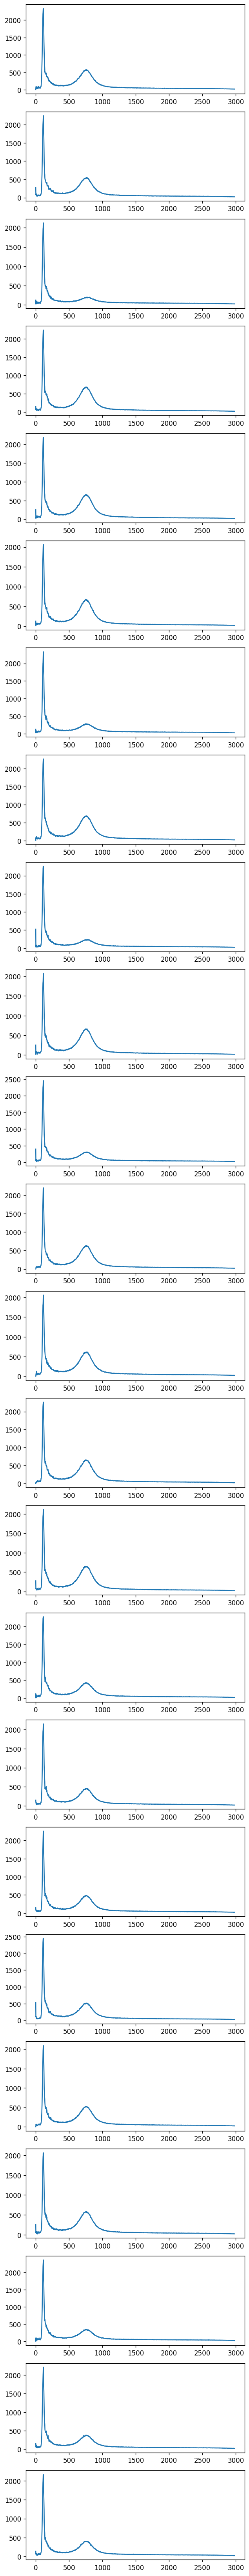

In [334]:
# sns.set()
sns.reset_orig()

# set figure size
plt.figure(figsize=(6, 3 * len(df_list)),dpi=120)

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
#  plt.plot(df.iloc[:, 3] * 10, df.iloc[:, 1])   # Option 1: real x axis
  plt.plot(range(len(df.iloc[:, 1])), df.iloc[:, 1])  # Option 2: index

# Fig 2
Find second peaks with scipy

In [ ]:
# Option1: scipy find_peaks

# second_peaks = []
# peaks_value = []

# for i, df in enumerate(df_list):
#   data = df.iloc[:, 1]
#   res, _ = find_peaks(data, height=500, distance=100)

#   if len(res) != 2:
#     raise Exception("Find peaks error, you need to adjust parameters in find_peaks")
#   second_peaks.append([res[1], data[res[1]]])
#   peaks_value.append(data[res[1]])

# print(second_peaks)

In [353]:
# Option 2: region maximum

REGION_START = 500
REGION_END = 1000

peaks_value = []

for df in df_list:
  data = df.iloc[:, 1]
  peaks_value.append(max(data[REGION_START:REGION_END]))

print(peaks_value)

[574.417542, 553.094055, 200.058334, 685.913208, 658.634949, 677.877625, 287.370239, 688.128784, 239.841171, 664.307434, 317.593201, 630.88623, 618.152344, 659.057312, 653.198914, 444.057678, 460.822205, 490.474487, 511.790222, 522.26355, 586.694336, 350.126373, 382.212067, 400.424377]


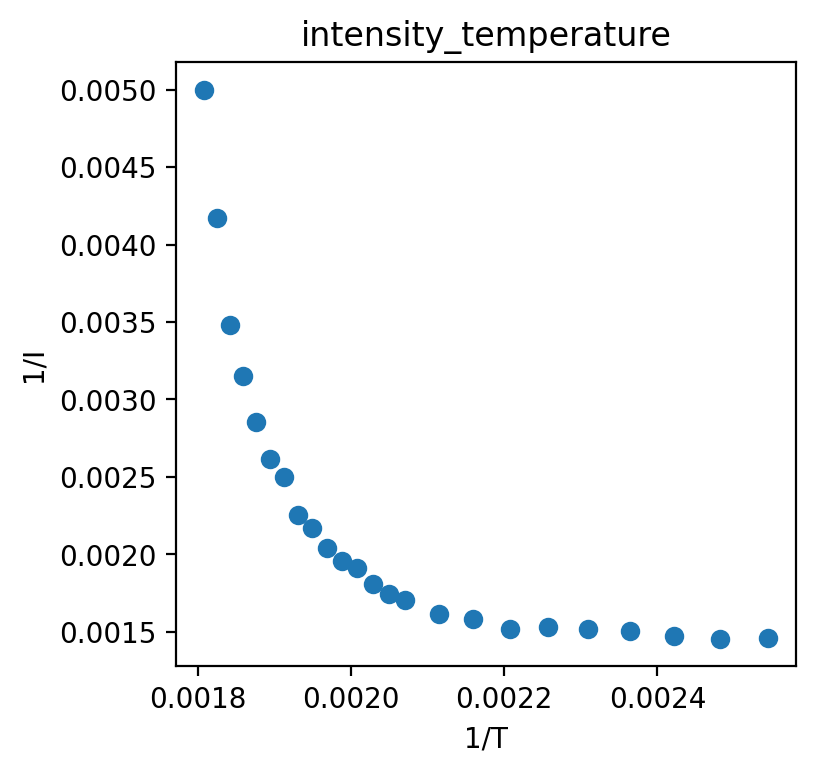

In [354]:
x = [1 / temp for temp in temp_list]
y = [1 / peak for peak in peaks_value]
# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(4, 4),dpi=200)
# 图片标题 
plt.title('intensity_temperature')
# 轴标题
plt.xlabel('1/T')
plt.ylabel('1/I')
# 画布粗细和刻度

plt.scatter(x, y, linewidth = 1.0, linestyle = '-')
plt.show()

[(0.0018083182640144665, 0.004998542075232917), (0.0018248175182481751, 0.004169425940636355), (0.001841620626151013, 0.003479831465776802), (0.0018587360594795538, 0.0031486820147639118), (0.001876172607879925, 0.0028561116131631706), (0.001893939393939394, 0.002616348583259147), (0.0019120458891013384, 0.0024973504547651454), (0.0019305019305019305, 0.0022519597105131015), (0.001949317738791423, 0.002170034319418267), (0.001968503937007874, 0.0020388420325724303), (0.0019880715705765406, 0.001953925567573661), (0.002008032128514056, 0.0019147420875916), (0.002028397565922921, 0.001808010755060457), (0.0020491803278688526, 0.001740893908842359), (0.002070393374741201, 0.0017044650657748977), (0.0021141649048625794, 0.0016177241900097042), (0.0021598272138228943, 0.001585071844094616), (0.002207505518763797, 0.001517318724475361), (0.002257336343115124, 0.0015309272238012326), (0.0023094688221709007, 0.0015182917358368118), (0.002364066193853428, 0.0015053271253923678), (0.002421307506

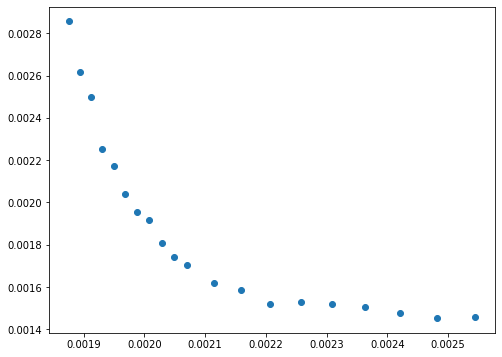

In [362]:
# sort
def sort_data(x, y):
  xy = [(xi, yi) for xi, yi in zip(x, y)]
  sorted_xy = sorted(xy, key=lambda item: item[0])
  print(sorted_xy)

  return [xi for xi, _ in sorted_xy], [yi for _, yi in sorted_xy]

x, y = sort_data(x, y)

plt.figure(figsize=(8, 6))
plt.scatter(x[4:], y[4:])
plt.show()

# Fig 3

248.54110824598547


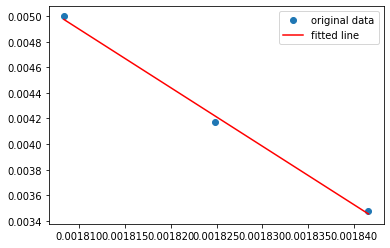

In [361]:
# linear regression

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize
from scipy.optimize import leastsq

x_fit = x[:3]
y_fit = y[:3]
# z1 = np.polyfit(x_fit, y_fit, 1)
# p1 = np. poly1d(z1)
# y_fitted = p1(x_fit)
# plt.scatter(x_fit, y_fit)
# plt.plot(x_fit, y_fitted)
# plt.show
res = st.linregress(x_fit, y_fit)
plt.plot(x_fit, y_fit, 'o', label='original data')
plt.plot(x_fit, res.intercept + res.slope*np.array(x_fit), 'r', label='fitted line')
print(1/(res.intercept/((-1)*res.slope))-273)
#print(res.intercept)
plt.legend()
plt.show()

# Fig 4

Fitting

Equations: @dandan

Objective:

The minimum of [the sum of least squares] for I_q_fit and I_q
note:

1. in dandan's case the subscript PMMA is PAGE
2. q is the forth column * 10
3. need rewrite: df.iloc[:, 3] * 10 is q; df.iloc[:, 1] is I_q
altering parameters (the last equation):
  - b_PS
  - b_PAGE
  - A_0
  - chi

Inputs: 
- M_w
- M_n
- M_n_PS
- a_1
- b_5
- m_S
- m_A
- rho_PS
- rho_PAGE
- v_nor = 118

Equation:
- w_PS = (m_S * b_5 / 5) / (m_A * a_1 + m_S * b_5 / 5)
- f_PS = w_PS / rho_PS / (w_PS / rho_PS + (1 - w_PS) / rho_PAGE)
- D_PS = D_PAGE = 1+(M_w / M_n - 1) / (w_PS ** 2 + (1 - w_PS))
- v_PS = m_S / rho_PS /  0.602
- v_PAGE = m_A / rho_PAGE / 0.602
- N_PS = v_PS * M_n_PS / v_nor / m_S
- N_PAGE = v_PAGE * (M_n - M_n_PS) / v_nor / m_A
- y_PS = N_PS * b_PS ** 2 * q ** 2 / 6
- y_PAGE = N_PAGE * b_PAGE ** 2 * q ** 2 / 6
- g1_PS = (1 - (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS
- g1_PAGE = (1 - (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE - 1) ** -1)) / y_PAGE
- g2_PS = 2 * (-1 + y_PS + (y_PS * (D_PS - 1) + 1) ** ((D_PS - 1) ** -1)) / y_PS ** 2
- g2_PAGE = 2 * (-1 + y_PAGE + (y_PAGE * (D_PAGE - 1) + 1) ** ((D_PAGE -1) ** -1)) / y_PAGE ** 2
- rc = (v_PS * N_PS + v_PAGE * N_PAGE) / (v_PS * v_PAGE) ** 1/2
- s_PS_PS = rc * f_PS ** 2 * g2_PS
- s_PAGE_PAGE = rc * (1 - f_PS) ** 2 * g2_PS
- s_PS_PAGE = rc * f_PS * (1 - f_PS) * g1_PS * g1_PAGE
- S_q = s_PS_PS + 2 * s_PS_PAGE + s_PAGE_PAGE
- W_q = s_PS_PS * s_PAGE_PAGE - s_PS_PAGE ** 2
- I_q_fit = A_0 / (S_q / W_q - 2 * chi)

# Fig 5

Gaussian fitting of second peak in Fig 1

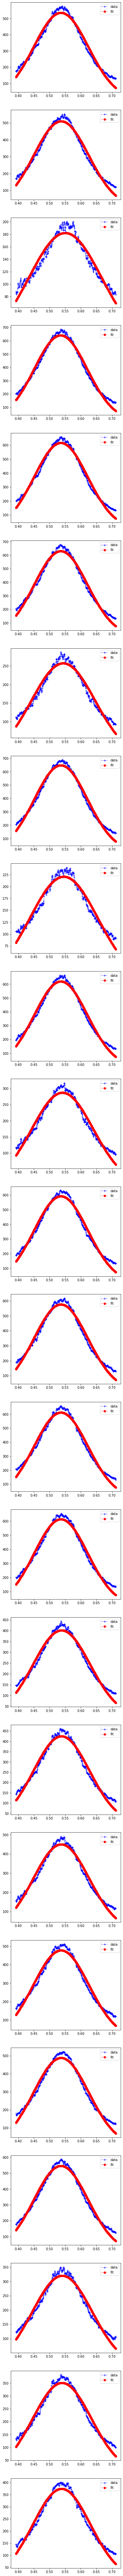

In [345]:
from scipy.optimize import curve_fit
import warnings
import numpy as np

warnings.filterwarnings('ignore')

START_REGION = 550
END_REGION  = 1000

def gaus(x, a, x0, sigma):
  return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

plt.figure(figsize=(6, 6 * len(df_list)))

fit_opt = []  # fitting parameters

for i, df in enumerate(df_list):
  plt.subplot(len(df_list), 1, i + 1)
  x = df.iloc[START_REGION: END_REGION, 3] * 10
  y = df.iloc[START_REGION: END_REGION, 1]

  n = len(x)                    
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

  popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
  fit_opt.append(popt)
  # popt是优化之后的三个参数，直接带入gauss使用
  plt.plot(x, y, 'b+:', label='data')
  plt.plot(x, gaus(x, *popt), 'ro:', label='fit')
  plt.legend()

FWHM:0.20669
FWHM:0.20669
FWHM:0.27697
FWHM:0.19982
FWHM:0.20164
FWHM:0.20138
FWHM:0.24164
FWHM:0.20111
FWHM:0.25707
FWHM:0.20113
FWHM:0.23306
FWHM:0.20290
FWHM:0.20357
FWHM:0.20324
FWHM:0.20190
FWHM:0.21528
FWHM:0.21102
FWHM:0.21029
FWHM:0.20985
FWHM:0.20861
FWHM:0.20547
FWHM:0.22606
FWHM:0.22117
FWHM:0.21717


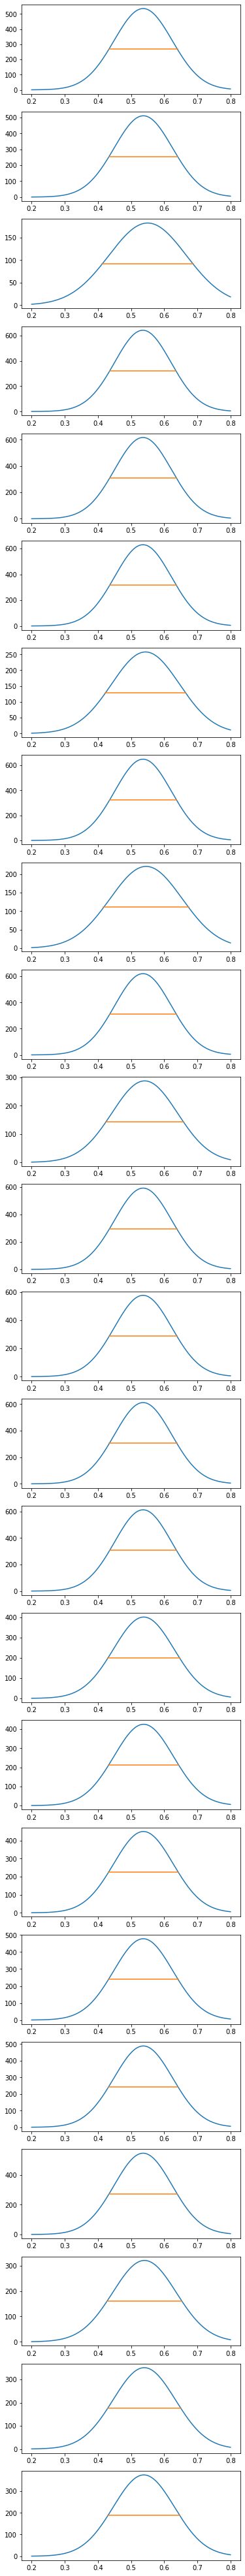

In [346]:
# 峰值的半峰宽度
def peak(x, c):
  return np.exp(-np.power(x - c, 2) / 16.0)

def lin_interp(x, y, i, half):
  return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
  half = (max(y) - min(y)) / 2.0
  signs = np.sign(np.add(y, -half))
  zero_crossings = (signs[0:-2] != signs[1:-1])
  zero_crossings_i = np.where(zero_crossings)[0]
  return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

START_GEN = 0.2   # region start and end
END_GEN = 0.8
hw_result = []    # store result

plt.figure(figsize=(6, 3 * len(df_list)))

for i, opt in enumerate(fit_opt):
  x = np.linspace(START_GEN, END_GEN, 1000)
  y = gaus(x, *opt)

  # find the two crossing points
  hmx = half_max_x(x, y)

  # print the answer
  fwhm = hmx[1] - hmx[0]
  hw_result.append(fwhm)
  print("FWHM:{:.5f}".format(fwhm))

  # a convincing plot
  half = max(y) / 2.0

  # plot
  plt.subplot(len(df_list), 1, i + 1)
  plt.plot(x, y)
  plt.plot(hmx, [half, half])

# Fig 6

[(120, 5.004567316491238), (130, 4.972351328245377), (140, 4.96574734888089), (150, 4.97191728372053), (160, 4.959276873780011), (170, 4.952913048541879), (180, 4.920217635220664), (190, 4.928452918232781), (200, 4.912396282736197), (210, 4.866783552269686), (215, 4.838111483159297), (220, 4.838113787836582), (225, 4.7937207979322825), (230, 4.7652540145019335), (235, 4.755335169962863), (240, 4.7389484655314265), (245, 4.6450536548495736), (250, 4.604664806205401), (255, 4.521404291044165), (260, 4.423680695831178), (265, 4.290720553889294), (270, 4.1383564769219365), (275, 3.8900597377735204), (280, 3.6105633171407723)]


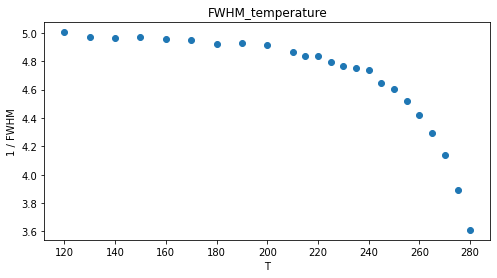

            0
5.004567  120
4.972351  130
4.965747  140
4.971917  150
4.959277  160
4.952913  170
4.920218  180
4.928453  190
4.912396  200
4.866784  210
4.838111  215
4.838114  220
4.793721  225
4.765254  230
4.755335  235
4.738948  240
4.645054  245
4.604665  250
4.521404  255
4.423681  260
4.290721  265
4.138356  270
3.890060  275
3.610563  280


In [347]:
from tabulate import tabulate

x = [temp - 273 for temp in temp_list]
y = [1 / hw for hw in hw_result]

x, y = sort_data(x, y)

# 画布大小 figsize, 清晰度 dpi
plt.figure(figsize=(8, 4))
# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
# 画布粗细和刻度
plt.scatter(x[0:], y[0:], linewidth = 1.0, linestyle = '-')
plt.show()
df = pd.DataFrame(x[0:],y[0:])
print(df)

# Fig 7

x = 259.6796379357007, y = 4.688258074236211


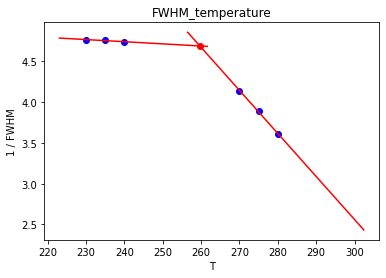

In [352]:
import numpy as np
import sympy

x_fit1 = x[13:16]
y_fit1 = y[13:16]

res1 = st.linregress(x_fit1, y_fit1)
plt.scatter(x_fit1, y_fit1, color='b', label='original data')
x_fitted1 = np.linspace(0.97 * x_fit1[0], 1.09 * x_fit1[len(x_fit1) - 1], 20)   # x coordination
plt.plot(x_fitted1, res1.intercept + res1.slope*np.array(x_fitted1), 'r', label='fitted line')

x_fit2 = x[21:]
y_fit2 = y[21:]
res2 = st.linregress(x_fit2, y_fit2)
plt.scatter(x_fit2, y_fit2, color='b', label='original data')
x_fitted2 = np.linspace(0.95 * x_fit2[0], 1.08 * x_fit2[len(x_fit2) - 1], 20)   # x coordination
plt.plot(x_fitted2, res2.intercept + res2.slope*np.array(x_fitted2), 'r', label='fitted line')

# cal intersection
inter_x = (res1.intercept - res2.intercept) / (res2.slope - res1.slope)
inter_y = res2.intercept + res2.slope * inter_x
plt.scatter(inter_x, inter_y, color='r')
# plt.figure(figsize=(6, 4),dpi=200)

# 图片标题 
plt.title('FWHM_temperature')
# 轴标题
plt.xlabel('T')
plt.ylabel('1 / FWHM')
print(f'x = {inter_x}, y = {inter_y}')